In [1]:
import pandas as pd
import numpy as np
import os
from string import ascii_uppercase
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
study_name = 'Training'
study_id = study_name.upper()
subjects = int(float('12'))
#numerical = 49 # +1 for age
#categorical = 46 # +4 for gender, split2,4 & 14 

In [4]:
subject_index = ["subject_{}".format(i) for i in range(1, subjects+1)]

In [5]:
np.random.seed(1)

### Demographic variables

In [10]:
#Numerical
age = np.random.normal(50,10,subjects).round(1)

gender = np.random.choice(['Male', 'Female'], subjects)
group = ['Control']*(subjects//2) + ['Treatment']*(subjects//2 + subjects % 2)

demo = [gender, age, group]

header = ('Demographics+Gender', 'Demographics+Age', 'Study_Design+Group')
demo_data = list(zip(*demo))
df_demo = pd.DataFrame(demo_data, columns=header, index=subject_index)
demo_length = df_demo.shape[1]

In [11]:
df_demo

,Demographics+Gender,Demographics+Age,Study_Design+Group
subject_1,Male,43.1,Control
subject_2,Female,41.5,Control
subject_3,Female,43.3,Control
subject_4,Male,49.9,Control
subject_5,Male,38.8,Control
subject_6,Female,52.3,Control
subject_7,Male,66.6,Treatment
subject_8,Male,57.4,Treatment
subject_9,Male,48.1,Treatment
subject_10,Female,41.1,Treatment


### Create bloodpressure variable
1. three trials visits
1. two instances per visit
1. declining for treatment group

In [12]:
trial_visits = 3
instances = 2
bloodpressure_basis = 80
bloodpressure_decline_rate = 10

In [13]:
rows = list()
columns = ('SUBJ_ID', 'TRIAL_VISIT', 'INSTANCE_NUM', 'Measurements+Blood_pressure')
for subject in subject_index:
    instance_num = 0
    for i in range(trial_visits):
        for j in range(instances):
            noise = np.random.normal(0, 0.10 * bloodpressure_basis)
            group = df_demo.loc[subject,'Study_Design+Group']
            if group == 'Treatment':
                blood_pressure_value = bloodpressure_basis - i * bloodpressure_decline_rate + noise
            else:
                blood_pressure_value = bloodpressure_basis + noise
            instance_num += 1
            row = {
                'SUBJ_ID':subject,
                'TRIAL_VISIT':i+1,
                'INSTANCE_NUM':instance_num,
                'Measurements+Blood_pressure':blood_pressure_value
            }
            rows.append(row)

data_df = pd.DataFrame(data=rows, columns=columns)

In [36]:
data_df

,SUBJ_ID,TRIAL_VISIT,INSTANCE_NUM,Measurements+Blood_pressure
0,subject_1,1,1,82.401363
1,subject_1,1,2,77.182001
2,subject_1,2,3,70.859854
3,subject_1,2,4,77.205258
4,subject_1,3,5,78.328846
5,subject_1,3,6,84.692986
6,subject_2,1,1,86.711867
7,subject_2,1,2,87.448817
8,subject_2,2,3,82.284699
9,subject_2,2,4,87.081129


In [37]:
from collections import defaultdict
coordinates = defaultdict(list)
coordinates_by_group = {'Treatment':{1:[], 2:[], 3: []}, 'Control':{1:[], 2:[], 3: []}}
for i in data_df.groupby(('SUBJ_ID', 'TRIAL_VISIT')):
    visit = i[0][1]
    subject = i[0][0]
    group = df_demo.loc[subject,'Study_Design+Group']
    value = np.mean(i[1]['Measurements+Blood_pressure'])
    coordinates[subject].append((visit, value))
    coordinates_by_group[group][visit].append(value)
    

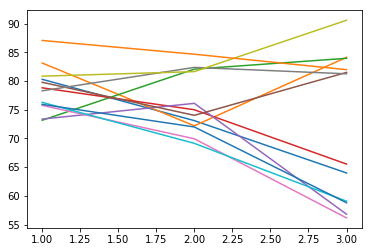

In [34]:
for value in coordinates.values():
    plt.plot([x[0] for x in value],[x[1] for x in value])

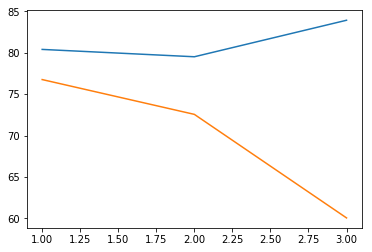

In [51]:
x_values = defaultdict(list)
for group in coordinates_by_group:
    for visit in coordinates_by_group[group]:
        value = np.mean(coordinates_by_group[group][visit])
        x_values[group].append(value)

for group in x_values:
    plt.plot([1,2,3], x_values[group])
    plt.legend = (x_values.keys())
    

### Output

In [23]:
study_dir = study_name
column_map_file = 'column_map.txt'
demo_df_name = 'demografics_data.txt'
data_df_name = 'blood_pressure_data.txt'

In [24]:
if not os.path.exists(study_dir):
    os.mkdir(study_dir)

study_params = os.path.join(study_dir, 'study.params')
with open(study_params, 'w') as handle:
    handle.write('STUDY_ID={}'.format(study_id)+os.linesep)
    handle.write("TOP_NODE=\\Public Studies\\{}\\".format(study_name)+os.linesep)
    handle.write("SECURITY_REQUIRED=N")
    

In [25]:
clinical_dir = os.path.join(study_dir,'clinical')
if not os.path.exists(clinical_dir):
    os.mkdir(clinical_dir)

clinical_params = os.path.join(clinical_dir, 'clinical.params')
with open(clinical_params, 'w') as handle:
    handle.write('COLUMN_MAP_FILE={}'.format(column_map_file))

In [26]:
column_map_rows = [[demo_df_name, '', 1,'SUBJ_ID','','']]
first = True
for df, correction in ((df_demo,2), (data_df,1)):
    if first:
        filename = demo_df_name
        first = False
    else:
        filename = data_df_name
    for i, col in enumerate(df.columns):
        parts = col.split('+')
        if len(parts) == 1:
            path = "General"
            label = parts[0]
        else:
            path = parts[0]
            label = parts[1]
        row = [filename, path, i+correction, label, '', '']
        column_map_rows.append(row)

header = ["Filename", "Path", "column", "label", "Thing", "Thing2"]
column_map = pd.DataFrame(column_map_rows, columns=header)

In [27]:
column_map

,Filename,Path,column,label,Thing,Thing2
0,demografics_data.txt,,1,SUBJ_ID,,
1,demografics_data.txt,Demographics,2,Gender,,
2,demografics_data.txt,Demographics,3,Age,,
3,demografics_data.txt,Study_Design,4,Group,,
4,blood_pressure_data.txt,General,1,SUBJ_ID,,
5,blood_pressure_data.txt,General,2,TRIAL_VISIT,,
6,blood_pressure_data.txt,General,3,INSTANCE_NUM,,
7,blood_pressure_data.txt,Measurements,4,Blood_pressure,,


In [28]:
output_filename = os.path.join(clinical_dir, demo_df_name)
df_demo.to_csv(output_filename, sep='\t', index_label='SubjectID', index=True, header=True)

In [29]:
output_filename = os.path.join(clinical_dir, data_df_name)
data_df.to_csv(output_filename, sep='\t', index=False, header=True)

In [30]:
column_map_filename = os.path.join(clinical_dir, column_map_file)
column_map.to_csv(column_map_filename, sep='\t', index=False)